Connected to MySQL Server version: 9.5.0

Top 20 Users by Regularity Index (Higher index = more regular cycles.)
     user_id           user_name  regularity_index
0        18   Mitali Chatterjee             42.00
1       103          Kriti Sood             35.00
2        88          Damini Sen             28.00
3        74          Sonal Rane             26.33
4        66      Komal Deshmukh             14.50
5        52        Chhavi Sinha             14.50
6        92  Vanshika Chowdhury             14.20
7        62   Rachita Venkatesh             10.87
8        97      Smriti Talreja             10.67
9        59         Tanuja Vyas             10.61
10       79     Navya Ravindran             10.00
11        1          Riya Patel             10.00
12      109     Yashika Agarwal              9.57
13       96     Tanishka Pillai              8.67
14      101       Ankita Chopra              8.50
15       23       Dia Mukherjee              8.29
16       64       Avantika Nair     

/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:17: DeprecationWarning: Call to deprecated function get_server_info. Reason: 
    The property counterpart 'server_info' should be used instead.

  print("Connected to MySQL Server version:", connection.get_server_info())
/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query1, connection)
/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


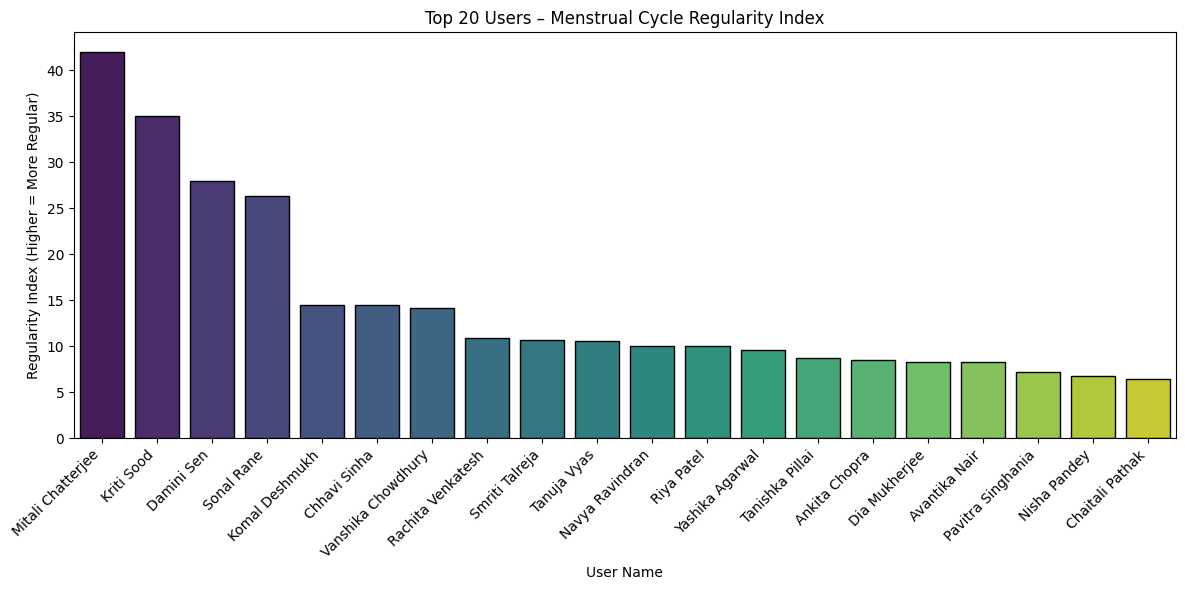


Avg Severity Score per Symptom Type:
    symptom_type  avg_severity_score
0        Cramps                2.50
1   Mood Swings                2.30
2       Fatigue                2.20
3      Insomnia                2.17
4     Back Pain                2.13
5    Depression                2.00
6   Hot Flashes                1.67
7       Anxiety                1.57
8      Headache                1.50
9          Acne                1.50
10     Bloating                1.20
11       Nausea                1.00


/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:69: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query2, connection)
/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


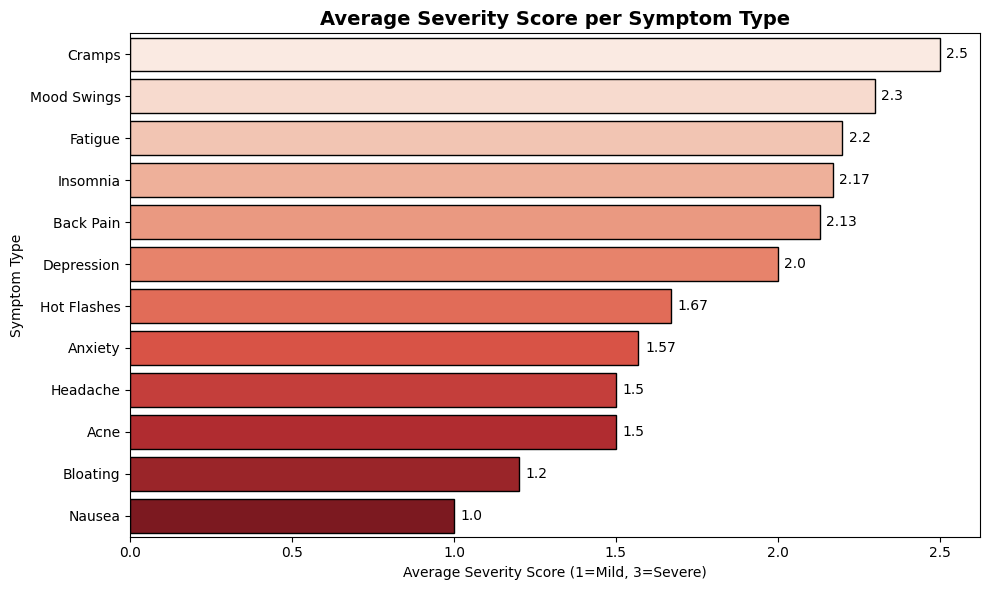


Most Commonly Used Medications:
    medication_name  usage_count
0      Meftal-Spas           21
1         Dolo 650           18
2  Iron Supplement           16
3  Tranexamic Acid           15
4         Cyclopam           11
5   Mefenamic Acid           10
6       Feronia XT           10


/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:105: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query3, connection)


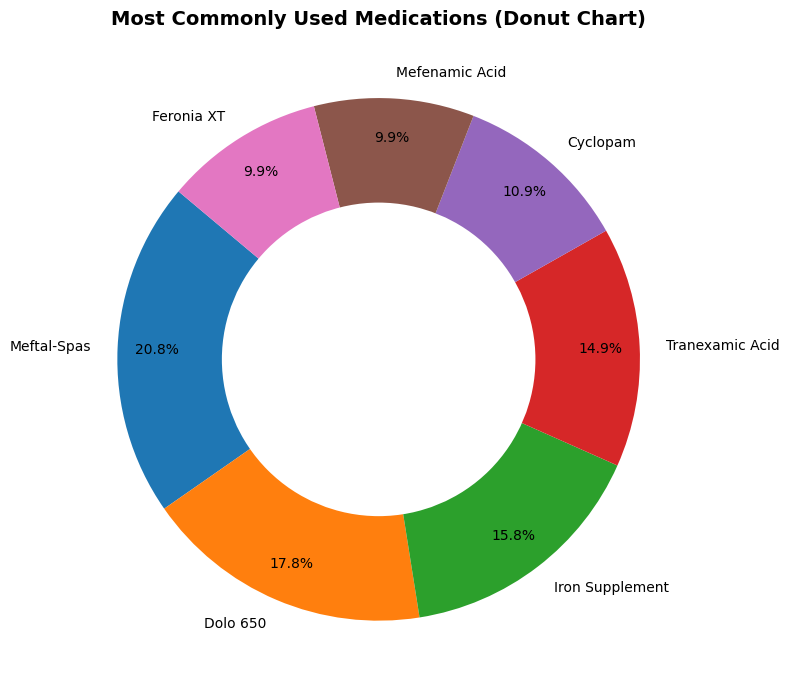

/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:132: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query4, connection)



Flow Types Distribution
   flow_type  count
0    Medium     43
1     Heavy     27
2     Light     21
3  Spotting     11


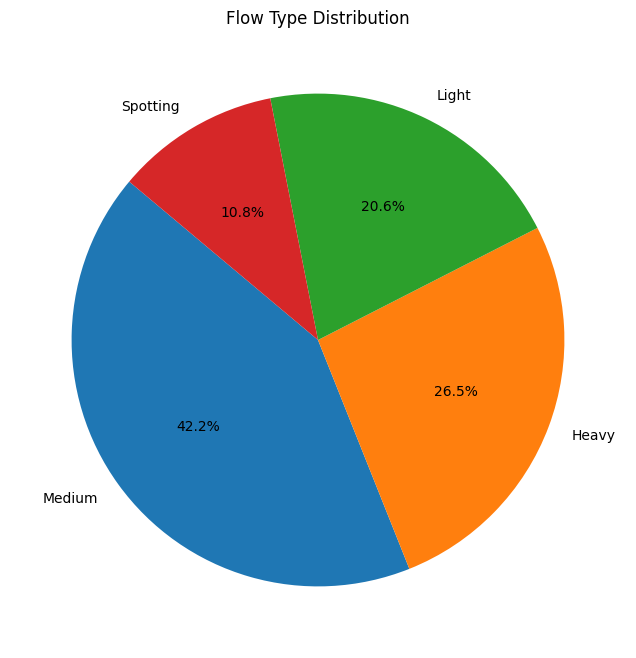


Symptom Severity Trend Scatter Plot (First 10 rows):

  symptom_type symptom_date  severity_score
0       Cramps   2024-03-10               3
1     Headache   2024-03-10               2
2     Bloating   2024-03-11               1
3  Mood Swings   2024-03-11               2
4      Fatigue   2024-03-12               2
5         Acne   2024-03-12               1
6    Back Pain   2024-03-13               3
7       Nausea   2024-03-13               1
8  Hot Flashes   2024-03-14               2
9     Insomnia   2024-03-15               2


/var/folders/_l/8k3ljk554txgg836_tflm2900000gn/T/ipykernel_27615/2444387736.py:159: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query5, connection)


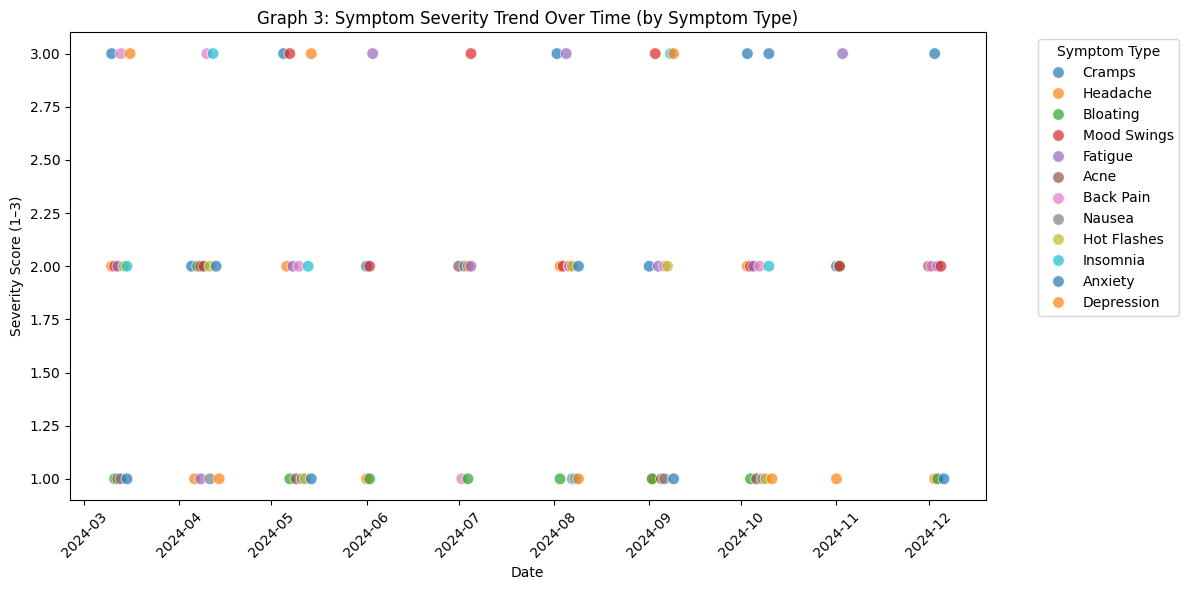


MySQL connection is closed


In [14]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    connection = mysql.connector.connect(
        host='127.0.0.1',
        database='period_tracker_db',
        user='root',
        password='',
        auth_plugin='mysql_native_password'
    )

    if connection.is_connected():
        print("Connected to MySQL Server version:", connection.get_server_info())

        query1 = """
        SELECT
            u.user_id,
            CONCAT(u.first_name, ' ', u.last_name) AS user_name,
            ROUND(AVG(c.cycle_len) / STDDEV(c.cycle_len), 2) AS regularity_index
        FROM Cycles c
        JOIN User u ON u.user_id = c.user_id
        GROUP BY u.user_id
        HAVING STDDEV(c.cycle_len) > 0
        ORDER BY regularity_index DESC
        LIMIT 20;
        """

        df = pd.read_sql(query1, connection)
        print("\nTop 20 Users by Regularity Index (Higher index = more regular cycles.)\n", df)

        plt.figure(figsize=(12, 6))

        sns.barplot(
            data=df,
            x='user_name',
            y='regularity_index',
            edgecolor='black',
            linewidth=1,
            palette='viridis'
        )

        plt.xticks(rotation=45, ha='right')
        plt.title("Top 20 Users – Menstrual Cycle Regularity Index")
        plt.xlabel("User Name")
        plt.ylabel("Regularity Index (Higher = More Regular)")
        plt.tight_layout()
        plt.show()


        query2 = """
        SELECT
            symptom_type,
            ROUND(AVG(
                CASE
                    WHEN severity = 'Mild' THEN 1
                    WHEN severity = 'Moderate' THEN 2
                    WHEN severity = 'Severe' THEN 3
                END
            ), 2) AS avg_severity_score
        FROM Symptoms
        GROUP BY symptom_type
        ORDER BY avg_severity_score DESC;
        """

        df = pd.read_sql(query2, connection)
        print("\nAvg Severity Score per Symptom Type:\n", df)

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=df,
            y='symptom_type',
            x='avg_severity_score',
            palette='Reds',
            edgecolor='black'
        )

        for index, row in df.iterrows():
            plt.text(
                row['avg_severity_score'] + 0.02,
                index,
                row['avg_severity_score'],
                va='center'
            )

        plt.title("Average Severity Score per Symptom Type", fontsize=14, weight='bold')
        plt.xlabel("Average Severity Score (1=Mild, 3=Severe)")
        plt.ylabel("Symptom Type")

        plt.tight_layout()
        plt.show()

        query3 = """
        SELECT
            medication_name,
            COUNT(*) AS usage_count
        FROM Medication_Log
        GROUP BY medication_name
        ORDER BY usage_count DESC;
        """

        df = pd.read_sql(query3, connection)
        print("\nMost Commonly Used Medications:\n", df)
        
        plt.figure(figsize=(8, 8))

        wedges, texts, autotexts = plt.pie(
            df['usage_count'],
            labels=df['medication_name'],
            autopct='%1.1f%%',
            startangle=140,
            pctdistance=0.85
        )

        centre_circle = plt.Circle((0, 0), 0.60, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        plt.title("Most Commonly Used Medications (Donut Chart)", fontsize=14, weight='bold')
        plt.tight_layout()
        plt.show()

        query4= """
        SELECT flow_type, COUNT(*) AS count
        FROM Flow
        GROUP BY flow_type;
        """

        df = pd.read_sql(query4, connection)
        print("\nFlow Types Distribution\n", df)

        plt.figure(figsize=(8, 8))
        plt.pie(
            df['count'],
            labels=df['flow_type'],
            autopct='%1.1f%%',
            startangle=140
        )

        plt.title("Flow Type Distribution")
        plt.show()

        query5 = """
        SELECT 
            symptom_type, 
            symptom_date,
            CASE 
                WHEN severity = 'Mild' THEN 1 
                WHEN severity = 'Moderate' THEN 2 
                WHEN severity = 'Severe' THEN 3 
            END AS severity_score
        FROM Symptoms
        ORDER BY symptom_date;
        """

        df = pd.read_sql(query5, connection)

        print("\nSymptom Severity Trend Scatter Plot (First 10 rows):\n")
        print(df.head(10))

        plt.figure(figsize=(12,6))
        sns.scatterplot(
            data=df,
            x='symptom_date',
            y='severity_score',
            hue='symptom_type',
            palette='tab10',
            s=70,
            alpha=0.7
        )

        plt.title("Graph 3: Symptom Severity Trend Over Time (by Symptom Type)")
        plt.ylabel("Severity Score (1–3)")
        plt.xlabel("Date")
        plt.xticks(rotation=45)
        plt.legend(title="Symptom Type", bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()


except Error as e:
    print("Error connecting:", e)

finally:
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("\nMySQL connection is closed")
